# Import Libraries and Load Data

In [30]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [32]:
# Connect to PostgreSQL server
import os
from dotenv import load_dotenv
load_dotenv()
from pangres import upsert
from sqlalchemy import text, create_engine

db_username = os.environ.get('db_username')
db_password = os.environ.get('db_password')
db_host = os.environ.get('db_host')
db_port = os.environ.get('db_port')
db_name = os.environ.get('db_name')

def create_db_connection_string(db_username, db_password, db_host, db_port, db_name):
    connection_url = 'postgresql+psycopg2://' + db_username + ':' + db_password + '@' + db_host + ':' + db_port + '/' + db_name
    return connection_url

conn = create_db_connection_string(db_username, db_password, db_host, db_port, db_name)

db_engine = create_engine(conn, pool_recycle = 3600)

    

In [33]:
with db_engine.connect() as connection:
    df = pd.read_sql(text('select * from soloq.regional_player_matches'), connection)

# Exploratory Data Analysis

In [34]:
# Head
df.head()

,uuid,matchId,teamId,gameDuration,gameVersion,summonerName,puuid,lane,role,summonerLevel,...,sightWardsBoughtInGame,longestTimeSpentLiving,timeCCingOthers,timePlayed,totalTimeCCDealt,totalTimeSpentDead,gameEndedInEarlySurrender,gameEndedInSurrender,teamEarlySurrendered,win
0,NA1_4899507239_iX7iCaDln4f59i-y-vmtFtZ9p4Bwhwj...,NA1_4899507239,100,2331,14.1.553.2414,ItsJustBlade,iX7iCaDln4f59i-y-vmtFtZ9p4Bwhwjp8gQ3sa7tb0dCl5...,TOP,SOLO,44,...,0,225,23,2331,77,439,False,False,False,False
1,NA1_4899507239_IQg6HTbwfXgSGer7yGhG-42ZjhUmoYo...,NA1_4899507239,100,2331,14.1.553.2414,DivinityKeegan,IQg6HTbwfXgSGer7yGhG-42ZjhUmoYofWZhI789Bgp72An...,JUNGLE,NONE,45,...,0,235,8,2331,277,551,False,False,False,False
2,NA1_4899507239_A-7aM_bVn43dikOWlvavG28XXTNXL18...,NA1_4899507239,100,2331,14.1.553.2414,Ezulder,A-7aM_bVn43dikOWlvavG28XXTNXL18d6V8JBytwEt3b3p...,MIDDLE,SOLO,371,...,0,521,24,2331,318,444,False,False,False,False
3,NA1_4899507239_fwvJQOWJYwAMzIIDzJYiTAit4fs3-oQ...,NA1_4899507239,100,2331,14.1.553.2414,Jhamburgr Jheþer,fwvJQOWJYwAMzIIDzJYiTAit4fs3-oQXN-A7y3GXf1wca-...,BOTTOM,CARRY,645,...,0,631,14,2331,253,230,False,False,False,False
4,NA1_4899507239_EOD5R7BxJvjGW-Zy_2bLt1hQcyCWDwZ...,NA1_4899507239,100,2331,14.1.553.2414,dudebo99,EOD5R7BxJvjGW-Zy_2bLt1hQcyCWDwZsPwFLcXVfrbdg25...,BOTTOM,SUPPORT,220,...,0,622,76,2331,376,307,False,False,False,False


In [15]:
# Describe
df.describe()

,teamId,gameDuration,summonerLevel,champExperience,champLevel,kills,deaths,assists,doubleKills,tripleKills,...,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,sightWardsBoughtInGame,longestTimeSpentLiving,timeCCingOthers,timePlayed,totalTimeCCDealt,totalTimeSpentDead
count,10000.0000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,150.0000,1765.03700,317.856400,13406.460000,14.186100,6.057900,6.081000,7.751400,0.571100,0.075800,...,25.192900,1.198800,2.386100,10.86270,0.0,591.321700,25.527900,1765.03700,287.719300,176.414400
std,50.0025,514.11614,226.215715,5207.142903,3.400239,4.867886,3.552253,5.796599,0.984805,0.312192,...,20.739294,1.853759,2.906453,8.96574,0.0,307.619828,24.844548,514.11614,338.231041,123.776392
min,100.0000,103.00000,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,103.00000,0.000000,0.000000
25%,100.0000,1501.75000,137.750000,10177.750000,13.000000,2.000000,4.000000,4.000000,0.000000,0.000000,...,13.000000,0.000000,0.000000,6.00000,0.0,397.000000,10.000000,1501.75000,101.000000,82.000000
50%,150.0000,1800.00000,273.000000,13419.000000,15.000000,5.000000,6.000000,7.000000,0.000000,0.000000,...,19.000000,0.000000,1.000000,9.00000,0.0,550.500000,20.000000,1800.00000,201.000000,160.000000
75%,200.0000,2088.75000,447.250000,16726.000000,17.000000,9.000000,8.000000,11.000000,1.000000,0.000000,...,30.000000,2.000000,3.000000,13.00000,0.0,751.000000,34.000000,2088.75000,356.000000,250.000000
max,200.0000,3505.00000,1969.000000,34930.000000,18.000000,35.000000,24.000000,43.000000,8.000000,4.000000,...,154.000000,28.000000,33.000000,75.00000,0.0,2419.000000,372.000000,3505.00000,7230.000000,897.000000


In [18]:
#  Summary Stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   uuid                            10000 non-null  object
 1   matchId                         10000 non-null  object
 2   teamId                          10000 non-null  int64 
 3   gameDuration                    10000 non-null  int64 
 4   gameVersion                     10000 non-null  object
 5   summonerName                    10000 non-null  object
 6   puuid                           10000 non-null  object
 7   lane                            10000 non-null  object
 8   role                            10000 non-null  object
 9   summonerLevel                   10000 non-null  int64 
 10  teamPosition                    10000 non-null  object
 11  champExperience                 10000 non-null  int64 
 12  champLevel                      10000 non-null 

In [16]:
# All Columns
df.columns

Index(['uuid', 'matchId', 'teamId', 'gameDuration', 'gameVersion',
       'summonerName', 'puuid', 'lane', 'role', 'summonerLevel',
       'teamPosition', 'champExperience', 'champLevel', 'championName',
       'kills', 'deaths', 'assists', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'largestKillingSpree', 'largestMultiKill',
       'killingSprees', 'firstBloodAssist', 'firstBloodKill', 'unrealKills',
       'totalDamageDealt', 'totalDamageDealtToChampions',
       'totalDamageShieldedOnTeammates', 'totalDamageTaken', 'totalHeal',
       'trueDamageDealt', 'trueDamageDealtToChampions', 'trueDamageTaken',
       'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'i

In [19]:
# Nulls
df.isna().sum()

uuid                         0
matchId                      0
teamId                       0
gameDuration                 0
gameVersion                  0
                            ..
totalTimeSpentDead           0
gameEndedInEarlySurrender    0
gameEndedInSurrender         0
teamEarlySurrendered         0
win                          0
Length: 83, dtype: int64

No null values... will investigate further

## Seperating numerical and categorical features

In [20]:
df.describe().columns

Index(['teamId', 'gameDuration', 'summonerLevel', 'champExperience',
       'champLevel', 'kills', 'deaths', 'assists', 'doubleKills',
       'tripleKills', 'quadraKills', 'pentaKills', 'largestKillingSpree',
       'largestMultiKill', 'killingSprees', 'unrealKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'inhibitorTakedowns', 'inhibitorsLost', 'turretKills',
       'turretTakedowns', 'turretsLost', 'goldEarned', 'goldSpent',
       'neutralMinionsKilled', 'totalM

In [27]:
df_num = ['gameDuration', 'champExperience',
       'champLevel', 'kills', 'deaths', 'assists', 'doubleKills',
       'tripleKills', 'quadraKills', 'pentaKills', 'largestKillingSpree',
       'largestMultiKill', 'killingSprees', 'unrealKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'inhibitorTakedowns', 'inhibitorsLost', 'turretKills',
       'turretTakedowns', 'turretsLost', 'goldEarned', 'goldSpent',
       'neutralMinionsKilled', 'totalMinionsKilled', 'itemsPurchased',
       'detectorWardsPlaced', 'visionScore', 'visionWardsBoughtInGame',
       'wardsKilled', 'wardsPlaced', 'sightWardsBoughtInGame',
       'longestTimeSpentLiving', 'timeCCingOthers', 'timePlayed',
       'totalTimeCCDealt', 'totalTimeSpentDead']
df_cat = ['teamId', 'item0', 'item1', 'item2',
       'item3', 'item4', 'item5', 'item6', 'lane', 'role', 'teamPosition', 'championName', 'gameEndedInEarlySurrender', 'gameEndedInSurrender',
       'teamEarlySurrendered', 'summonerLevel', 'win']

<Axes: xlabel='pentaKills', ylabel='Count'>

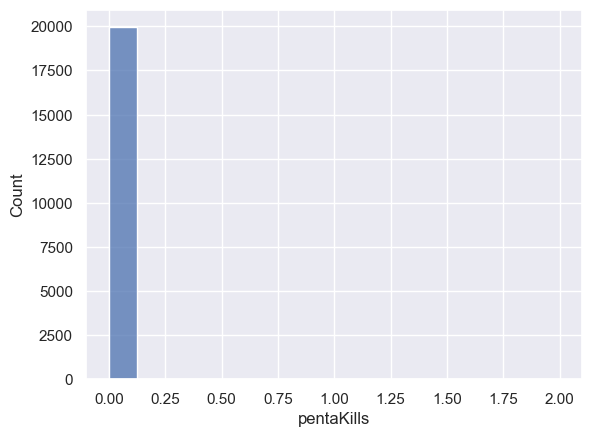

In [39]:
sns.histplot(data = df, x = '')